In [10]:
#NBVAL_IGNORE_OUTPUT
# Adding ignore due to (probably an np notebook magic) bug
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
from devito import *

In [3]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

In [4]:
from examples.seismic import Model, plot_velocity

# Función de generar campo de capas planas

In [7]:
def generar_campo_velocidades(shape, capas):
    """
    Genera un campo de velocidades con un número variable de capas.

    Parameters:
    - shape: Tuple que define la forma de la matriz (número de filas, número de columnas).
    - capas: Lista de tuplas, donde cada tupla contiene dos valores:
             (profundidad_final, velocidad), siendo profundidad_final la columna final de la capa
             y velocidad la velocidad asignada a esa capa.

    Returns:
    - Vel_Devito: Matriz numpy con el campo de velocidades.
    """
    Vel_Devito = np.empty(shape, dtype=np.float32)
    
    # Inicializar el índice inicial en 0
    indice_inicial = 0
    
    for profundidad_final, velocidad in capas:
        Vel_Devito[:, indice_inicial:profundidad_final] = velocidad
        indice_inicial = profundidad_final
    
    return Vel_Devito




# Función se muestreo de velocidades

In [8]:
def vel_inter(vel_original,intervalo):
    new_depth = np.arange(0, vel_original['DEPTH'].max(), intervalo)
    new_df = pd.DataFrame({'DEPTH': new_depth})
    new_df['ACOUSTIC_INTERVAL_VEL'] = np.interp(new_df['DEPTH'], vel_original['DEPTH'], vel_original['ACOUSTIC_INTERVAL_VEL'])
    label=f'Velocidad remuestreada a {intervalo} m'
    return {label:new_df}

In [69]:
def vel_interdf(vel_original,intervalo):
    new_depth = np.arange(0, vel_original['DEPTH'].max(), intervalo)
    new_df = pd.DataFrame({'DEPTH': new_depth})
    new_df['ACOUSTIC_INTERVAL_VEL'] = np.interp(new_df['DEPTH'], vel_original['DEPTH'], vel_original['ACOUSTIC_INTERVAL_VEL'])
    
    return new_df

# Función PLoteo Velocidades

In [9]:
def plot_vel(**vels):
    # Crear una figura con un tamaño específico
    plt.figure(figsize=(4, 8))  # Ajusta el tamaño a 12x8 pulgadas (puedes cambiar estos valores)
    
    for key, vel in vels.items():
        plt.plot(vel['ACOUSTIC_INTERVAL_VEL'], vel['DEPTH'], label=key)
    
    # Ajustar los ejes
    plt.gca().invert_yaxis()  # Invierte el eje Y
    
    # Añadir etiquetas y título
    plt.xlabel('Acoustic Interval Velocity (m/s)')
    plt.ylabel('Depth (m)')
    plt.title('Depth vs Acoustic Interval Velocity')
    
    # Añadir una leyenda para identificar las líneas
    plt.legend()
    
    # Mostrar la gráfica
    plt.show()

# importación de velocidad de pozo

In [11]:
Vel_Pozo= pd.read_csv('vel_pozo_edit.csv')

In [12]:
Vel_Pozo

,DEPTH,ACOUSTIC_INTERVAL_VEL,DELTA_DEPTH
0,128.67132,2107.0824,4.78536
1,133.45668,1933.9560,4.78536
2,138.24204,1833.0672,4.78536
3,143.02740,1778.5080,4.78536
4,147.81276,1723.0344,4.78536
...,...,...,...
502,2487.03084,4012.0824,4.78536
503,2491.81620,4429.9632,4.78536
504,2496.60156,4684.4712,4.78536
505,2501.38692,4578.7056,4.78536


In [15]:
Vel_original={'Vel original':Vel_Pozo}

# Remuestreo 

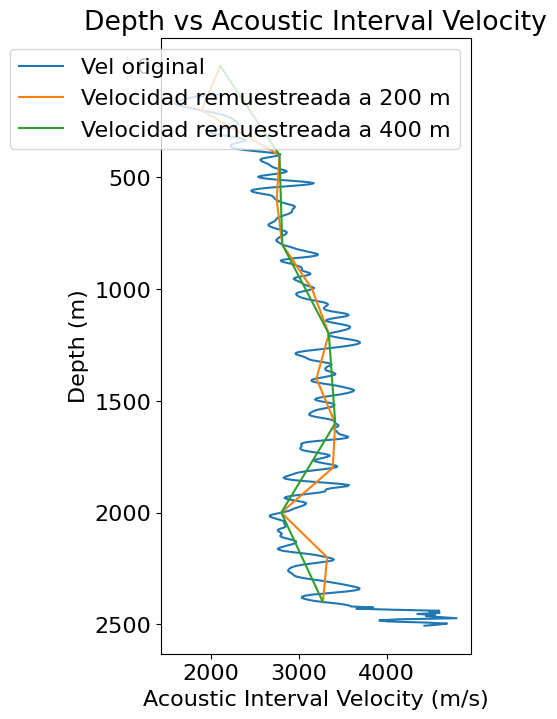

In [16]:
Intervalos=[200,400]
vel_total={}
for i in Intervalos:
    vel_total.update(vel_inter(Vel_Pozo,i))
plot_vel(**Vel_original,**vel_total)

In [73]:
Vel_400=vel_interdf(Vel_Pozo,400)
Vel_400

,DEPTH,ACOUSTIC_INTERVAL_VEL
0,0.0,2107.082400
1,400.0,2780.938634
2,800.0,2812.768130
3,1200.0,3341.299914
4,1600.0,3413.737085
5,2000.0,2801.417600
6,2400.0,3273.858841


In [75]:
Vel_400['CAPA_INFERIOR']=Vel_400['DEPTH']+200.0
Vel_400

,DEPTH,ACOUSTIC_INTERVAL_VEL,CAPA_INFERIOR
0,0.0,2107.082400,200.0
1,400.0,2780.938634,600.0
2,800.0,2812.768130,1000.0
3,1200.0,3341.299914,1400.0
4,1600.0,3413.737085,1800.0
5,2000.0,2801.417600,2200.0
6,2400.0,3273.858841,2600.0


In [21]:
# Define a physical size
shape = (101, 101)  # Number of grid point (nx, nz)
spacing = (25., 25.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

In [98]:
#Vel_400['FILA_INF']=round((Vel_400['CAPA_INFERIOR']*(shape[0]-1)/2600+1)
Vel_400['FILA_INF']=round(Vel_400['CAPA_INFERIOR']*(shape[0]-1)/2600+1)
Vel_400

,DEPTH,ACOUSTIC_INTERVAL_VEL,CAPA_INFERIOR,FILA_INF
0,0.0,2107.082400,200.0,9.0
1,400.0,2780.938634,600.0,24.0
2,800.0,2812.768130,1000.0,39.0
3,1200.0,3341.299914,1400.0,55.0
4,1600.0,3413.737085,1800.0,70.0
5,2000.0,2801.417600,2200.0,86.0
6,2400.0,3273.858841,2600.0,101.0


In [103]:
Vel_400['FILA_INF_int'] = Vel_400['FILA_INF'].astype(int)



In [104]:
capas=capas = list(zip(Vel_400['FILA_INF_int'], Vel_400['ACOUSTIC_INTERVAL_VEL']/1000))

capas
    

[(9, 2.1070824),
 (24, 2.7809386343949045),
 (39, 2.8127681298701304),
 (55, 3.3412999143812714),
 (70, 3.4137370849673205),
 (86, 2.8014176),
 (101, 3.273858840764335)]

In [105]:

#capas = [(8, 2.1), (24, 2.8), (39, 2.8), (54, 2.3), (70, 3.4), (85, 2.8), (101, 3.2) ]
v = generar_campo_velocidades(shape, capas)



Operator `initdamp` ran in 0.01 s


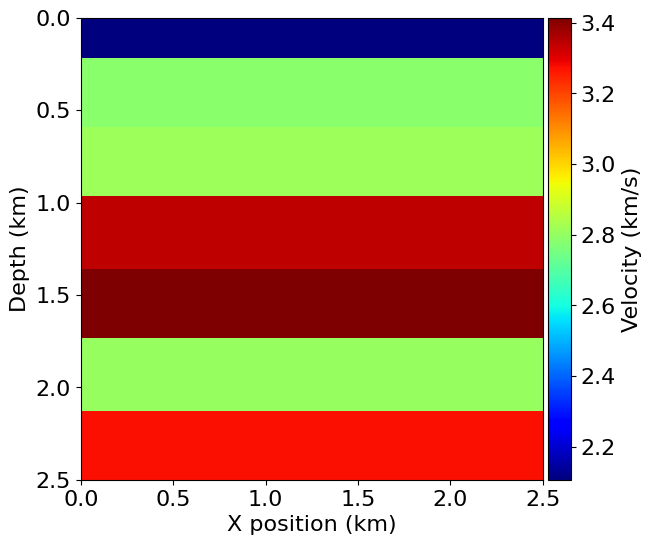

In [107]:
# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbl=10, bcs="damp")

plot_velocity(model)

In [108]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 2000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

In [109]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import RickerSource

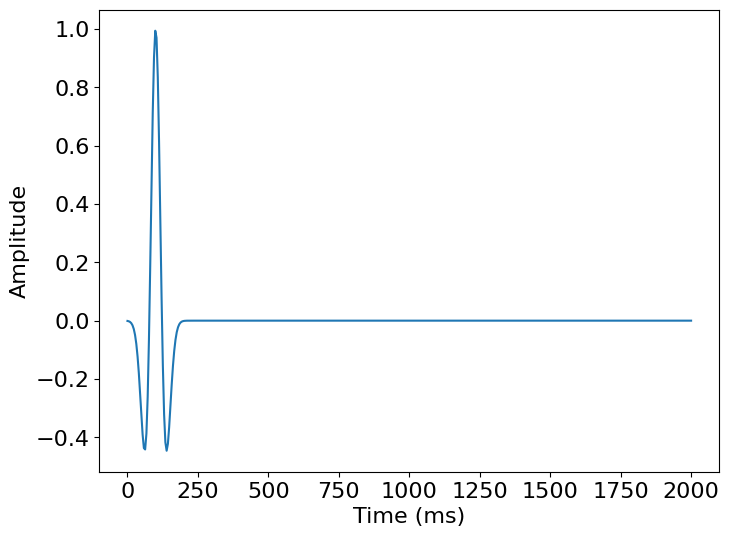

In [110]:
f0 = 0.010  # Source peak frequency is 10Hz (0.010 kHz)
src = RickerSource(name='src', grid=model.grid, f0=f0,
                   npoint=1, time_range=time_range)

# First, position source centrally in all dimensions, then set depth
src.coordinates.data[0, :] = np.array(model.domain_size) * .5
src.coordinates.data[0, -1] = 20.  # Depth is 20m

# We can plot the time signature to see the wavelet
src.show()


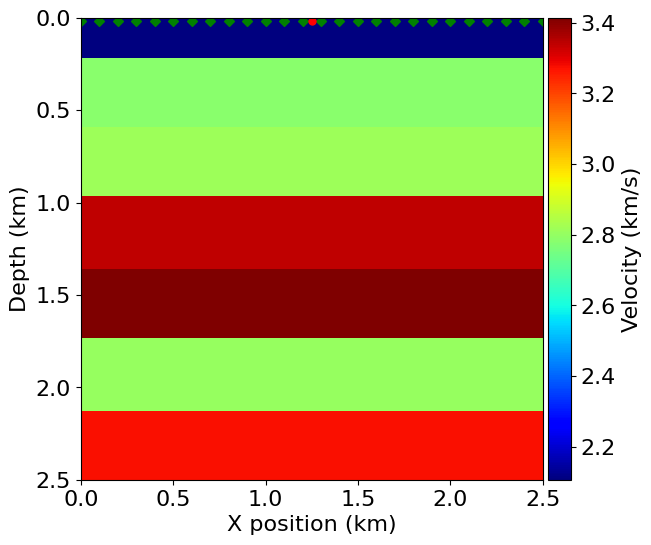

In [111]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Receiver

# Create symbol for 101 receivers
rec = Receiver(name='rec', grid=model.grid, npoint=101, time_range=time_range)

# Prescribe even spacing for receivers along the x-axis
rec.coordinates.data[:, 0] = np.linspace(0, model.domain_size[0], num=101)
rec.coordinates.data[:, 1] = 20.  # Depth is 20m

# We can now show the source and receivers within our domain:
# Red dot: Source location
# Green dots: Receiver locations (every 4th point)
plot_velocity(model, source=src.coordinates.data,
              receiver=rec.coordinates.data[::4, :])

In [112]:
from devito import TimeFunction

In [113]:
# Define the wavefield with the size of the model and the time dimension
u = TimeFunction(name="u", grid=model.grid, time_order=2, space_order=2)

# We can now write the PDE
pde = model.m * u.dt2 - u.laplace + model.damp * u.dt

# The PDE representation is as on paper
pde

damp(x, y)*Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2)) + Derivative(u(t, x, y), (t, 2))/vp(x, y)**2

In [114]:
# This discrete PDE can be solved in a time-marching way updating u(t+dt) from the previous time step
# Devito as a shortcut for u(t+dt) which is u.forward. We can then rewrite the PDE as 
# a time marching updating equation known as a stencil using customized SymPy functions
from devito import Eq, solve

stencil = Eq(u.forward, solve(pde, u.forward))
stencil

Eq(u(t + dt, x, y), (-(-2.0*u(t, x, y)/dt**2 + u(t - dt, x, y)/dt**2)/vp(x, y)**2 + Derivative(u(t, x, y), (x, 2)) + Derivative(u(t, x, y), (y, 2)) + damp(x, y)*u(t, x, y)/dt)/(damp(x, y)/dt + 1/(dt**2*vp(x, y)**2)))

In [115]:
# Finally we define the source injection and receiver read function to generate the corresponding code
src_term = src.inject(field=u.forward, expr=src * dt**2 / model.m)

# Create interpolation expression for receivers
rec_term = rec.interpolate(expr=u.forward)

In [116]:
#NBVAL_IGNORE_OUTPUT
from devito import Operator

op = Operator([stencil] + src_term + rec_term, subs=model.spacing_map)

In [117]:
#NBVAL_IGNORE_OUTPUT
op(time=time_range.num-1, dt=model.critical_dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.0032649999999999806, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section1', rank=None),
                     PerfEntry(time=2.2000000000000006e-05, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[])),
                    (PerfKey(name='section2', rank=None),
                     PerfEntry(time=0.00029900000000000076, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

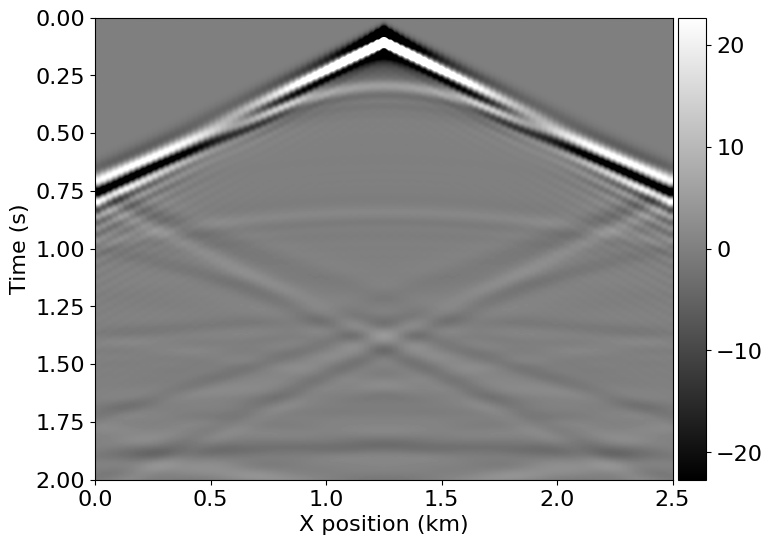

5 capas a 0.01  Khz


In [118]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import plot_shotrecord

plot_shotrecord(rec.data, model, t0, tn)
print(f'5 capas a {f0}  Khz')

In [119]:
assert np.isclose(np.linalg.norm(rec.data), 370, rtol=1)

AssertionError: 